# Understading and explaining the data

 
## The libraries that we are using are:

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen

import re #regular expression
from IPython.display import display, Markdown
from datetime import datetime
from IPython.display import Image
# plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.dates as matdates


## Let's load and understand the data


In [2]:
Image(url= "dataset/dpc-covid19-flusso-dati-it.jpg", width=1000, height=1000)

### Repository Structure

In [3]:
readme = urlopen("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/README.md").read().decode('utf=8')
repository_structure = readme.partition("## Struttura del repository\n")[2].partition("##")[0] 

display(Markdown(repository_structure))

```
COVID-19/
│
├── aree/
│   ├── geojson
│   │   ├── dpc-covid-19-ita-aree-comuni.geojson
│   │   ├── dpc-covid19-ita-aree.geojson
│   ├── shp
│   │   ├── dpc-covid19-ita-aree-comuni.dbf
│   │   ├── dpc-covid19-ita-aree-comuni.prj
│   │   ├── dpc-covid19-ita-aree-comuni.shp
│   │   ├── dpc-covid19-ita-aree-comuni.shx
│   │   ├── dpc-covid19-ita-aree.dbf
│   │   ├── dpc-covid19-ita-aree.prj
│   │   ├── dpc-covid19-ita-aree.shp
│   │   ├── dpc-covid19-ita-aree.shx
├── dati-andamento-nazionale/
│   ├── dpc-covid19-ita-andamento-nazionale-*.csv
│   ├── dpc-covid19-ita-andamento-nazionale-latest.csv
│   ├── dpc-covid19-ita-andamento-nazionale.csv
├── dati-contratti-dpc-forniture/
│   ├── dpc-covid19-dati-contratti-dpc-forniture.csv
│   ├── dpc-covid19-dati-pagamenti-contratti-dpc-forniture.csv
│   ├── dati-json
│   │   ├── dpc-covid19-dati-contratti-dpc-forniture.csv
│   │   ├── dpc-covid19-dati-pagamenti-contratti-dpc-forniture.csv
│   ├── file-atti-negoziali
│   │   ├── dpc-contratto-covid19-*.pdf
├── dati-json/
│   ├── dpc-covid19-ita-andamento-nazionale-latest.json
│   ├── dpc-covid19-ita-andamento-nazionale.json
│   ├── dpc-covid19-ita-note-en.json
│   ├── dpc-covid19-ita-note-it.json
│   ├── dpc-covid19-ita-province-latest.json
│   ├── dpc-covid19-ita-province.json
│   ├── dpc-covid19-ita-regioni-latest.json
│   ├── dpc-covid19-ita-regioni.json
├── dati-province/
│   ├── dpc-covid19-ita-province-*.csv
│   ├── dpc-covid19-ita-province-latest.csv
│   ├── dpc-covid19-ita-province.csv
├── dati-regioni/
│   ├── dpc-covid19-ita-regioni-*.csv
│   ├── dpc-covid19-ita-regioni-latest.csv
│   ├── dpc-covid19-ita-regioni.csv
├── metriche
│   ├── dpc-covid19-ita-metriche-dashboard-desktop.csv
│   ├── dpc-covid19-ita-metriche-dashboard-desktop.json
│   ├── dpc-covid19-ita-metriche-dashboard-mobile.csv
│   ├── dpc-covid19-ita-metriche-dashboard-mobile.json
├── note/
│   ├── dpc-covid19-ita-note-en.csv
│   ├── dpc-covid19-ita-note-it.csv
├── schede-riepilogative/
│   ├── province
│   │   ├── dpc-covid19-ita-scheda-province-*.pdf
│   ├── regioni
│   │   ├── dpc-covid19-ita-scheda-regioni-*.pdf
```



## Trend and general situation
As we can see from the resulting tree there are many datasets with which we can work. For the moment we will focus on the general dataset dpc-covid19-ita-national-trend.json, which contains the constantly updated list of the progress of the virus. 
Using the dataset dpc-covid19-ita-national-trend.json we build the general trend of people infected with covid-19. 

In [4]:
# infections url
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
dataframe = pd.read_json(url)

In [5]:
dataframe

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2022-02-04T17:00:00,ITA,19000,1440,20440,2197904,2218344,-109886,99522,9083090,...,174643465,49207964.0,None,114.0,NaN,NaN,7576778.0,3872823.0,82168606.0,92474859.0
712,2022-02-05T17:00:00,ITA,18615,1411,20026,2108517,2128543,-89801,93157,9265708,...,175489945,49348658.0,None,104.0,NaN,NaN,7608501.0,3934292.0,82366772.0,93123173.0
713,2022-02-06T17:00:00,ITA,18498,1431,19929,2053319,2073248,-55295,78952,9399717,...,176176489,49467196.0,None,105.0,NaN,NaN,7633243.0,3988493.0,82517134.0,93659355.0
714,2022-02-07T17:00:00,ITA,18675,1423,20098,1970603,1990701,-82547,41247,9523540,...,176570152,49539069.0,None,70.0,NaN,NaN,7646782.0,4016556.0,82605992.0,93964160.0


In [6]:
dataframe.columns # to see all the columns of the dataframe object

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

### The difference between "casi_da_sospetto_diagnostico" and "casi_da_screening":
Casi identificati dal sospetto diagnostico = casi positivi al tampone emersi da attività clinica.                              <br>Casi identificati da attività di screening = casi che emergono da indagini e test, pianificati a livello nazionale o regionale, che diagnosticano casi positivi al tampone.

## Now let's see the infected total cases and new cases/day using pandas dataframe

In [9]:
infections = dataframe[['totale_casi', 'nuovi_positivi']].copy()
infections.columns = ['total', 'daily'] 
date_format = '%Y-%m-%dT%H:%M:%S' #datetime format
infections.index = dataframe['data'].apply(lambda x: datetime.strptime(x, date_format)) #creates a datetime object from the given string
infections

,total,daily
data,,
2020-02-24 18:00:00,229,221
2020-02-25 18:00:00,322,93
2020-02-26 18:00:00,400,78
2020-02-27 18:00:00,650,250
2020-02-28 18:00:00,888,238
...,...,...
2022-02-04 17:00:00,11449601,99522
2022-02-05 17:00:00,11542793,93157
2022-02-06 17:00:00,11621736,78952


### Observation period and data collection

In [11]:
period = (
    datetime.strptime(dataframe["data"].iloc[-1], "%Y-%m-%dT%H:%M:%S") -  
    datetime.strptime(dataframe["data"].iloc[0], "%Y-%m-%dT%H:%M:%S") # Last_Day - First Day
).days
period


714

In [12]:
interval_df = pd.DataFrame(columns=['FIRST DATE','LAST DATE', 'INTERVAL'])
interval_df.loc[0] = [dataframe["data"].iloc[0]] + [dataframe["data"].iloc[-1]] + [period]
interval_df['FIRST DATE'] = pd.to_datetime(interval_df["FIRST DATE"])
interval_df['LAST DATE'] = pd.to_datetime(interval_df["LAST DATE"])

print("First date: {}".format(interval_df['FIRST DATE'][0]))
print("Last date: {}".format(interval_df['LAST DATE'][0]))
print("Interval: {} days".format(period))

interval_df

First date: 2020-02-24 18:00:00
Last date: 2022-02-08 17:00:00
Interval: 714 days


,FIRST DATE,LAST DATE,INTERVAL
0,2020-02-24 18:00:00,2022-02-08 17:00:00,714


### Daily trend of infections
Let's build a graph for the daily trend of infections by dividing the region of the graph into the respective **Phases** of the implemented decree:
   - **Phase 1**:  09/03/2020 - 03/05/2020 , Lockdown period.
   - **Phase 2**:  04/05/2020  - 14/06/2020 , Relaxation of containment measures.
   - **Phase 3**:  15/06/2020  -  06/11/2020, living with COVID-19 .
   - **Second wave**: 06/11/2020 -  14/12/2021, 06/11/2020-new DPCM that divides Italy into 3 zones.
   - **Third wave**:15/12/2021 - until now
   

In [43]:
Image(url= "dataset/italia_3_zone.jpg", width=500, height=500) # illustrative photo

In [51]:
# set dates for 'phase' 1 and 2.
phase_1 = pd.Timestamp('2020-03-09')
phase_2 = pd.Timestamp('2020-05-04')
phase_3 = pd.Timestamp('2020-06-15')
second_wave = pd.Timestamp('2020-10-18')
third_wave = pd.Timestamp('2021-12-15')

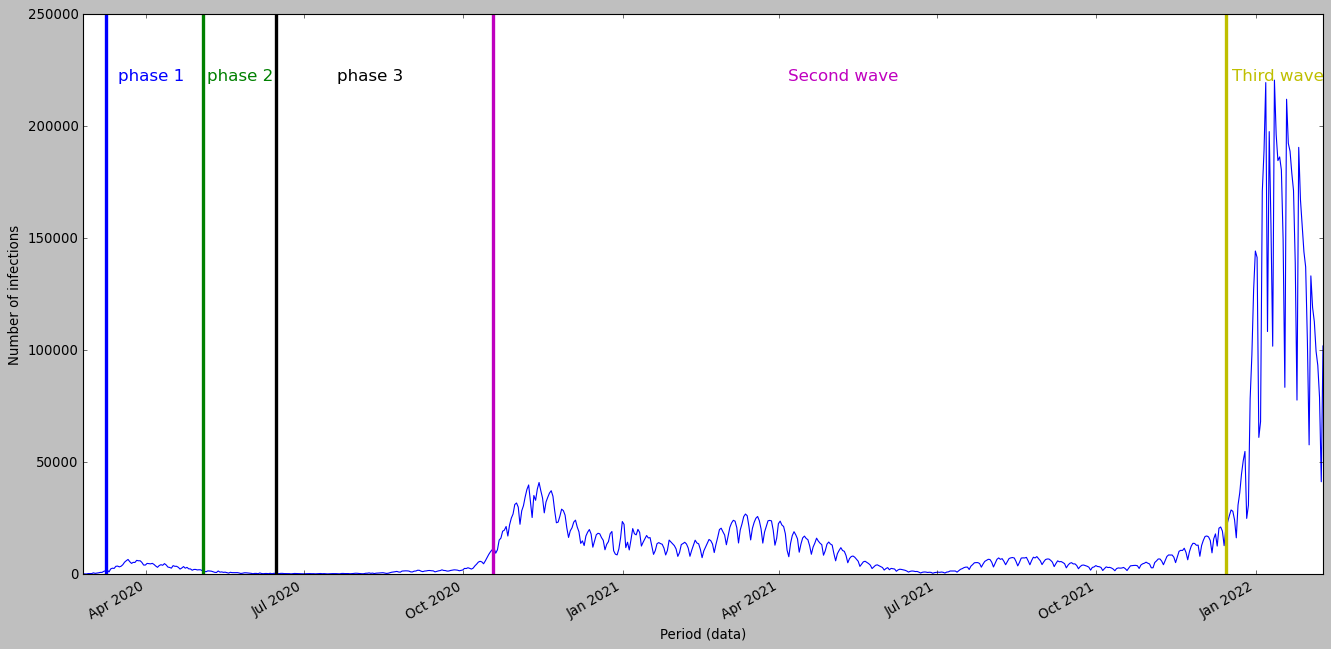

In [55]:
infections['daily'].plot(figsize=[20, 10])

# displaying labels on top of the plot
textY = infections['daily'].max()

# vertical line corresponding to the beginning of restriction laws (phase 1).
plt.axvline(phase_1,ymin=0, ymax=1, color='b',linewidth=3)
# using offset for setting the text in the midddle of the area between intervals
plt.text(phase_1 + pd.offsets.Day(7), textY, 'phase 1', fontsize=15,color='b' ) 

plt.axvline(phase_2,ymin=0, ymax=1, color='g',linewidth=3)
plt.text(phase_2 + pd.offsets.Day(2), textY, 'phase 2', fontsize=15, color='g')

plt.axvline(phase_3,ymin=0, ymax=1, color='k',linewidth=3)
plt.text(phase_3 + pd.offsets.Day(35), textY, 'phase 3', fontsize=15,color='k')

plt.axvline(second_wave,ymin=0, ymax=1, color='m',linewidth=3)
plt.text(second_wave + pd.offsets.Day(170), textY, 'Second wave', fontsize=15, color='m')

plt.axvline(third_wave,ymin=0, ymax=1, color='y',linewidth=3)
plt.text(third_wave + pd.offsets.Day(3), textY, 'Third wave', fontsize=15, color='y')

plt.xlabel("Period (data)")
plt.ylabel("Number of infections")
plt.show()

In [39]:
 infections['daily'].idxmax(axis = 0)

Timestamp('2022-01-11 17:00:00')

From the graphs shown above it is possible to see that the maximum daily number of infected people is **220532** and it is obtained on **11/01/2022**.

In [41]:
max_infections = infections['daily'].idxmax(axis = 0)
print("Day with the highest number of infections: ", max_infections.strftime("%d/%m/%Y"))
print("Number of infections: ", infections['daily'][max_infections])

Day with the highest number of infections:  11/01/2022
Number of infections:  220532


### Total positive change

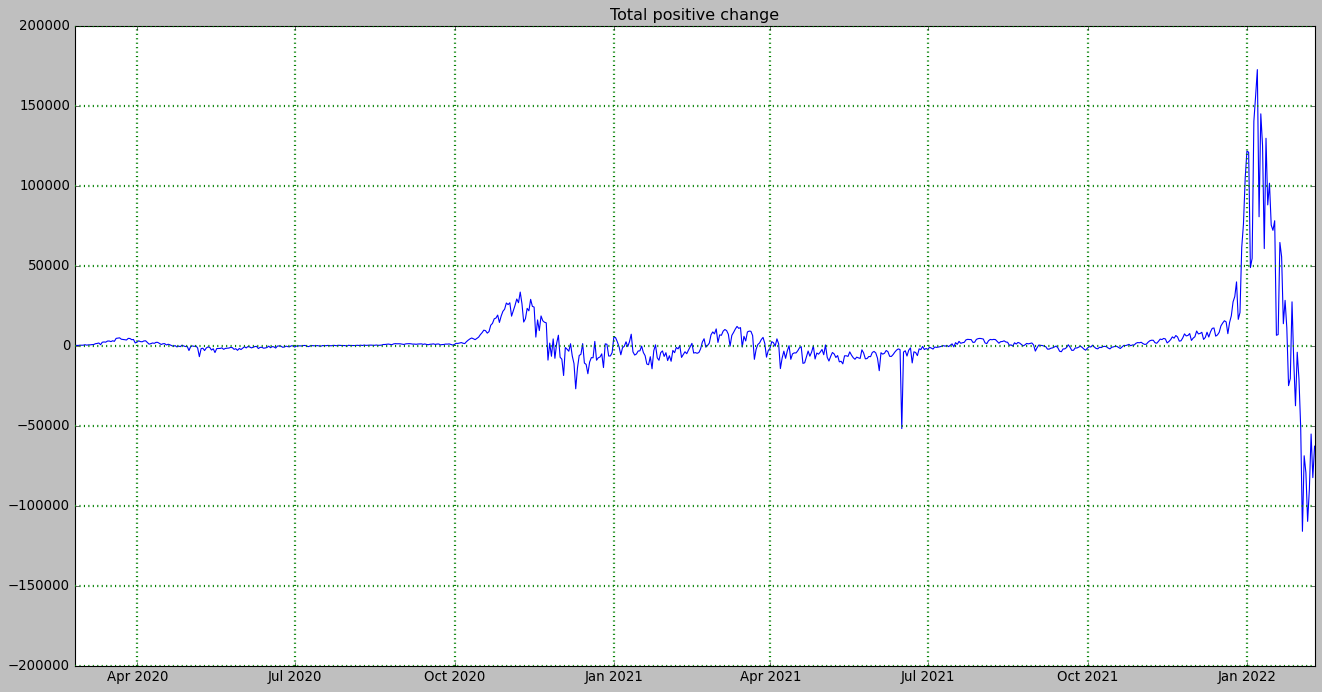

In [42]:
plt.style.use('classic')

fig = plt.figure(figsize=(20, 10))
x_axis = dataframe['data'].apply(lambda x: datetime.strptime(x, date_format))

plt.plot(x_axis, dataframe['variazione_totale_positivi'], color='b', label='Total positive change')
ax = plt.gca()
yabs_max = abs(max(ax.get_ylim(), key=abs)) # Force zero to the center of y axis 
ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)

plt.title('Total positive change')
plt.grid(linewidth=2,color='g')
plt.show()